# Normal distribution, L2 norm, Mahalanobis distance

In [5]:
import scipy as sp
import numpy as np

## Univariate Gaussian PDF
$N(\mu,\sigma)=(\frac{1}{\sigma^2 \sqrt(2\pi})e^{[\frac{-1}{2}(\frac{X-\mu}{\sigma})^2]}$

In [10]:
def univariate_gaussian_prob(X,mean,std):
    constant = 1/((std**2)*np.sqrt(2*np.pi))
    exponent = (X-mean)/std
    exponent = (-1/2) * exponent**2
    prob = constant * np.exp(exponent)
    return prob
def show_ugp(X,mean,std):
    print("P(%d|mean=%d,std=%d)=%f"%(X,mean,std,univariate_gaussian_prob(X,mean,std)))

In [14]:
# Prob drops as distance from mean increases
show_ugp(5,5,1)
show_ugp(4,5,1)
show_ugp(6,5,1)
show_ugp(3,5,1)

P(5|mean=5,std=1)=0.398942
P(4|mean=5,std=1)=0.241971
P(6|mean=5,std=1)=0.241971
P(3|mean=5,std=1)=0.053991


In [16]:
# Prob drops as variance increases
show_ugp(5,5,1)
show_ugp(5,5,2)
show_ugp(5,5,3)


P(5|mean=5,std=1)=0.398942
P(5|mean=5,std=2)=0.099736
P(5|mean=5,std=3)=0.044327


### Numpy support 
Deprecated: numpy.linalg.norm  

Supported: numpy.random.normal   
Supported: numpy.random.Generator.normal  
Supported: numpy.random.default_rng().normal  

np.normal(mu, sigma, size) # size can be like 1000 or like (2,5)

In [35]:
from numpy.random import normal
import matplotlib.pyplot as plt
from scipy import stats

In [36]:
data = normal(10,1,5)
data

array([8.79026544, 8.50537994, 8.96152752, 9.98478607, 9.83824821])

In [37]:
theoretical_mean=10
theoretical_std=1
observations=5000
data = normal(theoretical_mean,theoretical_std,observations)
sample_mean = np.mean(data)
sample_std = np.std(data)
print("Observed mean",sample_mean,"std",sample_std)

Observed mean 10.007078954036901 std 1.0156049802366778


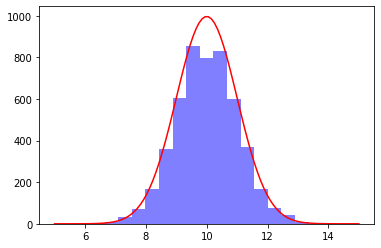

In [40]:
num_bins = 20
x = np.linspace(5,15,100)
plt.plot(x, 0.5*observations*stats.norm.pdf(x, theoretical_mean, theoretical_std),color='red')
plt.hist(data, bins=num_bins, facecolor='blue', alpha=0.5)
plt.show()